# House Price Prediction

## Load the Dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv("housing.csv")

In [74]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [76]:
data.dropna(inplace=True) # Remove null values

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Exploration

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = data.drop(["median_house_value"], axis=1) # Data without the column whose values we want to predict
y = data["median_house_value"] # The column whose values we want to predict

In [80]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [81]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split the data into training and testing datasets

In [83]:
train_data = X_train.join(y_train)

In [84]:
train_data # Training related data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3031,-119.42,35.40,24.0,2585.0,480.0,1442.0,424.0,2.8452,INLAND,104700.0
12392,-116.41,33.74,17.0,4289.0,893.0,958.0,440.0,2.4659,INLAND,177800.0
1246,-122.08,39.25,52.0,224.0,38.0,120.0,45.0,3.0170,INLAND,112500.0
12396,-116.29,33.67,12.0,5048.0,842.0,883.0,391.0,5.6918,INLAND,231300.0
20347,-119.00,34.19,5.0,3634.0,718.0,1317.0,743.0,4.2917,<1H OCEAN,227900.0
...,...,...,...,...,...,...,...,...,...,...
4007,-118.63,34.16,30.0,3346.0,487.0,1296.0,495.0,7.4570,<1H OCEAN,392700.0
5122,-118.31,33.96,47.0,1586.0,322.0,1077.0,339.0,4.4861,<1H OCEAN,140400.0
18154,-122.05,37.36,27.0,2621.0,513.0,1063.0,523.0,3.9848,<1H OCEAN,409700.0
18930,-122.14,38.07,31.0,3401.0,616.0,1750.0,602.0,4.6761,NEAR BAY,143100.0


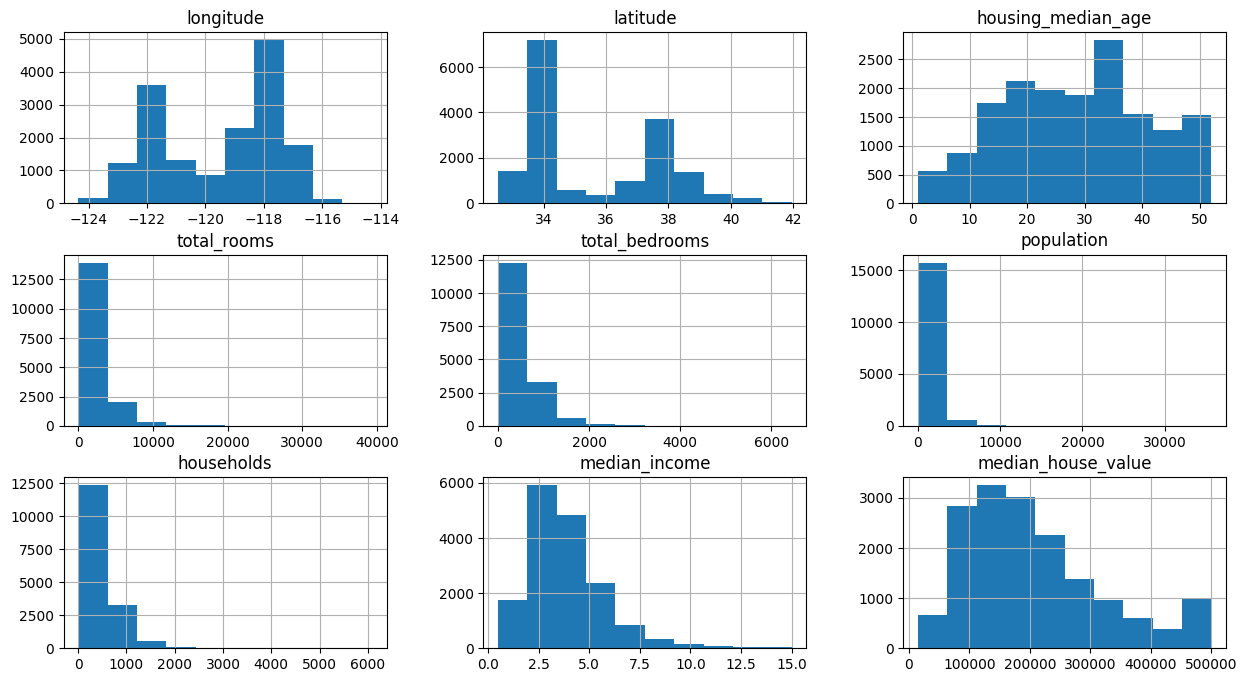

In [85]:
train_data.hist(figsize=(15, 8)); # We notice 4 features look skewed

In [86]:
train_data.drop(["ocean_proximity"], axis=1).corr() # Looking for correlation between the data; dropped a troublesome column, temporarily

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925201,-0.108234,0.046848,0.073904,0.105142,0.060987,-0.018385,-0.048879
latitude,-0.925201,1.000000,0.010829,-0.035929,-0.069482,-0.111632,-0.074496,-0.076024,-0.140660
housing_median_age,-0.108234,0.010829,1.000000,-0.360314,-0.317588,-0.292274,-0.300161,-0.122276,0.106571
total_rooms,0.046848,-0.035929,-0.360314,1.000000,0.928587,0.851850,0.917088,0.190293,0.126638
total_bedrooms,0.073904,-0.069482,-0.317588,0.928587,1.000000,0.871542,0.979525,-0.015989,0.045287
population,0.105142,-0.111632,-0.292274,0.851850,0.871542,1.000000,0.901259,-0.004005,-0.032442
households,0.060987,-0.074496,-0.300161,0.917088,0.979525,0.901259,1.000000,0.005056,0.060577
median_income,-0.018385,-0.076024,-0.122276,0.190293,-0.015989,-0.004005,0.005056,1.000000,0.683632
median_house_value,-0.048879,-0.140660,0.106571,0.126638,0.045287,-0.032442,0.060577,0.683632,1.000000


<Axes: >

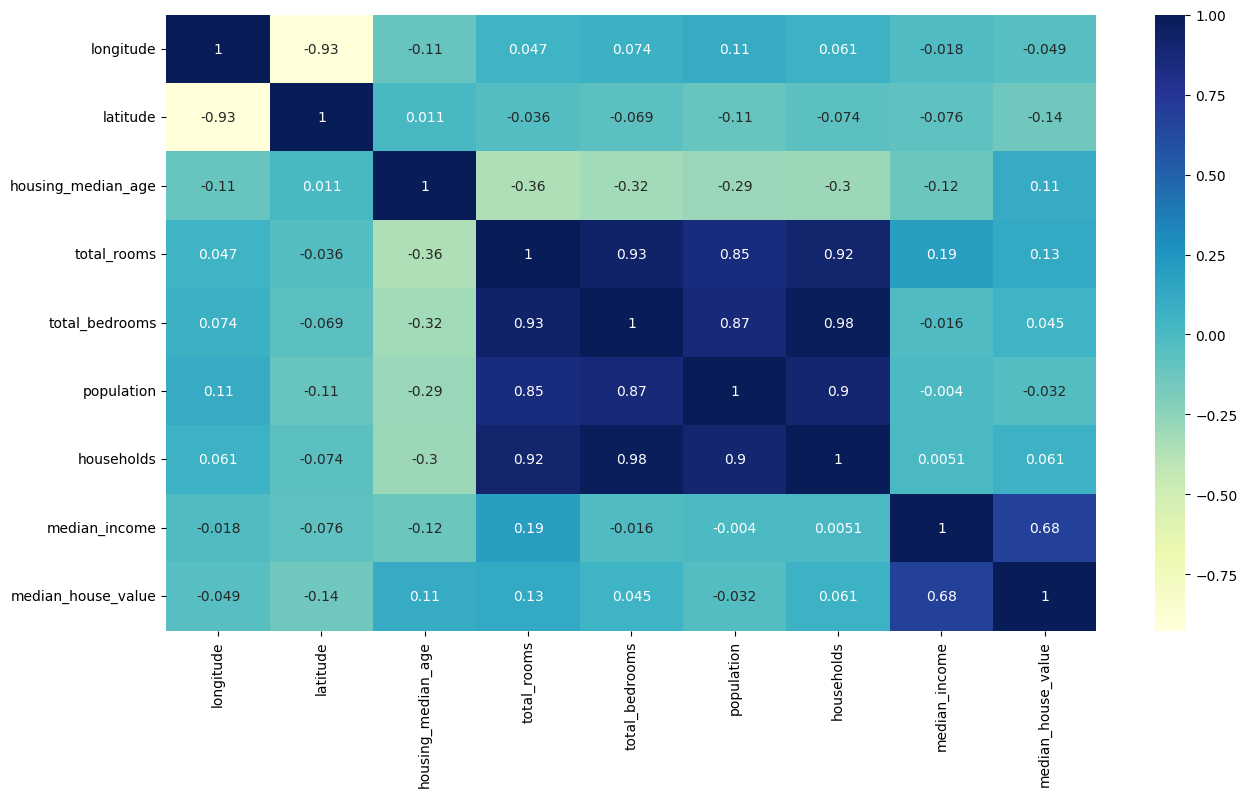

In [87]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(["ocean_proximity"], axis=1).corr(), annot=True, cmap="YlGnBu") # Same as before but pretty

## Data Preprocessing

In [88]:
# We take the skewed features and find their logarithm
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

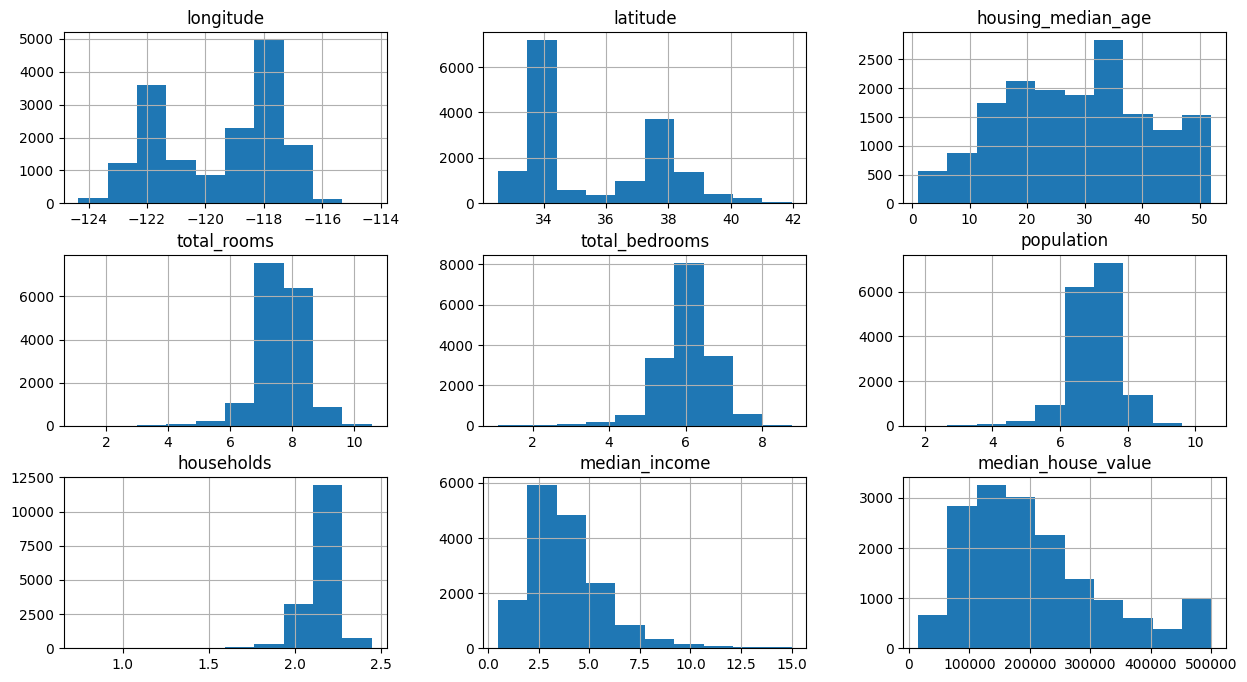

In [89]:
# We notice they now better resemble a Gaussian bell curve
train_data.hist(figsize=(15, 8));

In [90]:
# We now attempt to better represent the ocean_proximity feature
train_data.ocean_proximity.value_counts() # We will turn each value into its own feature

ocean_proximity
<1H OCEAN     7258
INLAND        5152
NEAR OCEAN    2118
NEAR BAY      1815
ISLAND           3
Name: count, dtype: int64

In [91]:
pd.get_dummies(train_data.ocean_proximity) # We have turned each value into its own feature

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3031,False,True,False,False,False
12392,False,True,False,False,False
1246,False,True,False,False,False
12396,False,True,False,False,False
20347,True,False,False,False,False
...,...,...,...,...,...
4007,True,False,False,False,False
5122,True,False,False,False,False
18154,True,False,False,False,False
18930,False,False,False,True,False


In [92]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # We append the new features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3031,-119.42,35.40,24.0,7.857868,6.175867,7.274480,2.181306,2.8452,INLAND,104700.0,False,True,False,False,False
12392,-116.41,33.74,17.0,8.364042,6.795706,6.865891,2.236877,2.4659,INLAND,177800.0,False,True,False,False,False
1246,-122.08,39.25,52.0,5.416100,3.663562,4.795791,1.858811,3.0170,INLAND,112500.0,False,True,False,False,False
12396,-116.29,33.67,12.0,8.526945,6.736967,6.784457,2.254124,5.6918,INLAND,231300.0,False,True,False,False,False
20347,-119.00,34.19,5.0,8.198364,6.577861,7.183871,2.219026,4.2917,<1H OCEAN,227900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,-118.63,34.16,30.0,8.115820,6.190315,7.167809,2.210011,7.4570,<1H OCEAN,392700.0,True,False,False,False,False
5122,-118.31,33.96,47.0,7.369601,5.777652,6.982863,2.124606,4.4861,<1H OCEAN,140400.0,True,False,False,False,False
18154,-122.05,37.36,27.0,7.871693,6.242223,6.969791,2.182866,3.9848,<1H OCEAN,409700.0,True,False,False,False,False
18930,-122.14,38.07,31.0,8.132119,6.424869,7.467942,2.211798,4.6761,NEAR BAY,143100.0,False,False,False,True,False


In [93]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1) # ocean_proximity is now obsolete

In [94]:
train_data # Verify how the data looks after the modifications

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3031,-119.42,35.40,24.0,7.857868,6.175867,7.274480,2.181306,2.8452,104700.0,False,True,False,False,False
12392,-116.41,33.74,17.0,8.364042,6.795706,6.865891,2.236877,2.4659,177800.0,False,True,False,False,False
1246,-122.08,39.25,52.0,5.416100,3.663562,4.795791,1.858811,3.0170,112500.0,False,True,False,False,False
12396,-116.29,33.67,12.0,8.526945,6.736967,6.784457,2.254124,5.6918,231300.0,False,True,False,False,False
20347,-119.00,34.19,5.0,8.198364,6.577861,7.183871,2.219026,4.2917,227900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,-118.63,34.16,30.0,8.115820,6.190315,7.167809,2.210011,7.4570,392700.0,True,False,False,False,False
5122,-118.31,33.96,47.0,7.369601,5.777652,6.982863,2.124606,4.4861,140400.0,True,False,False,False,False
18154,-122.05,37.36,27.0,7.871693,6.242223,6.969791,2.182866,3.9848,409700.0,True,False,False,False,False
18930,-122.14,38.07,31.0,8.132119,6.424869,7.467942,2.211798,4.6761,143100.0,False,False,False,True,False


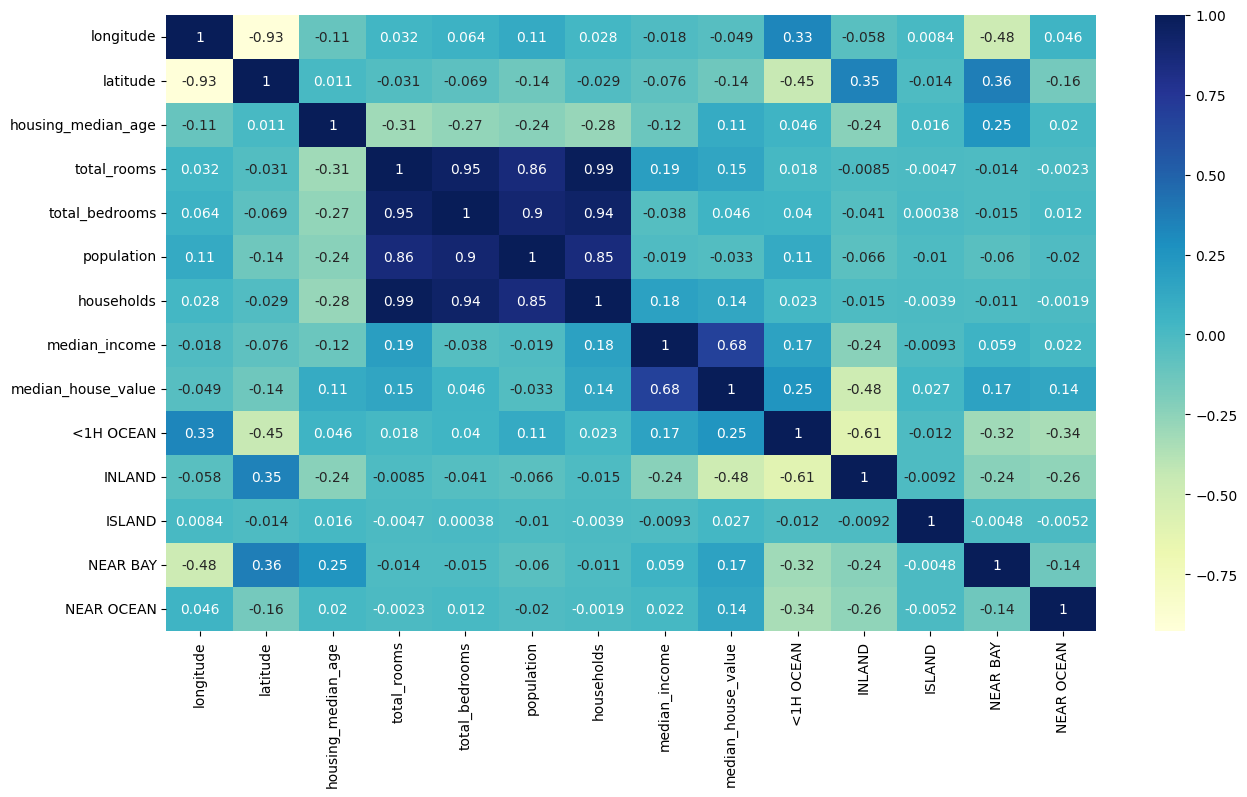

In [95]:
plt.figure(figsize=(15, 8)) # We can better observe the correlation between proximity to water and house price
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

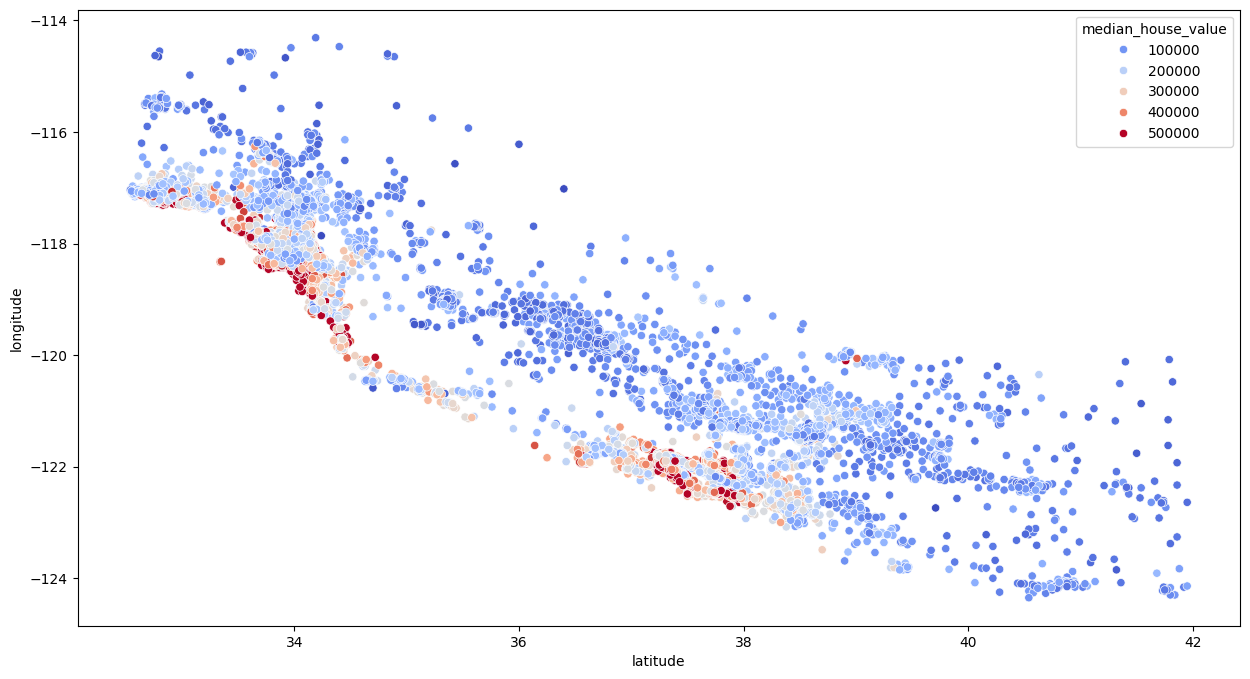

In [96]:
plt.figure(figsize=(15, 8)) # Interestingly, using a scatterplot allows us to notice where the coast would be situated on the map of California, as the prices increase near the ocean
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm");

## Feature Engineering

In [97]:
# Possibly insightful features
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

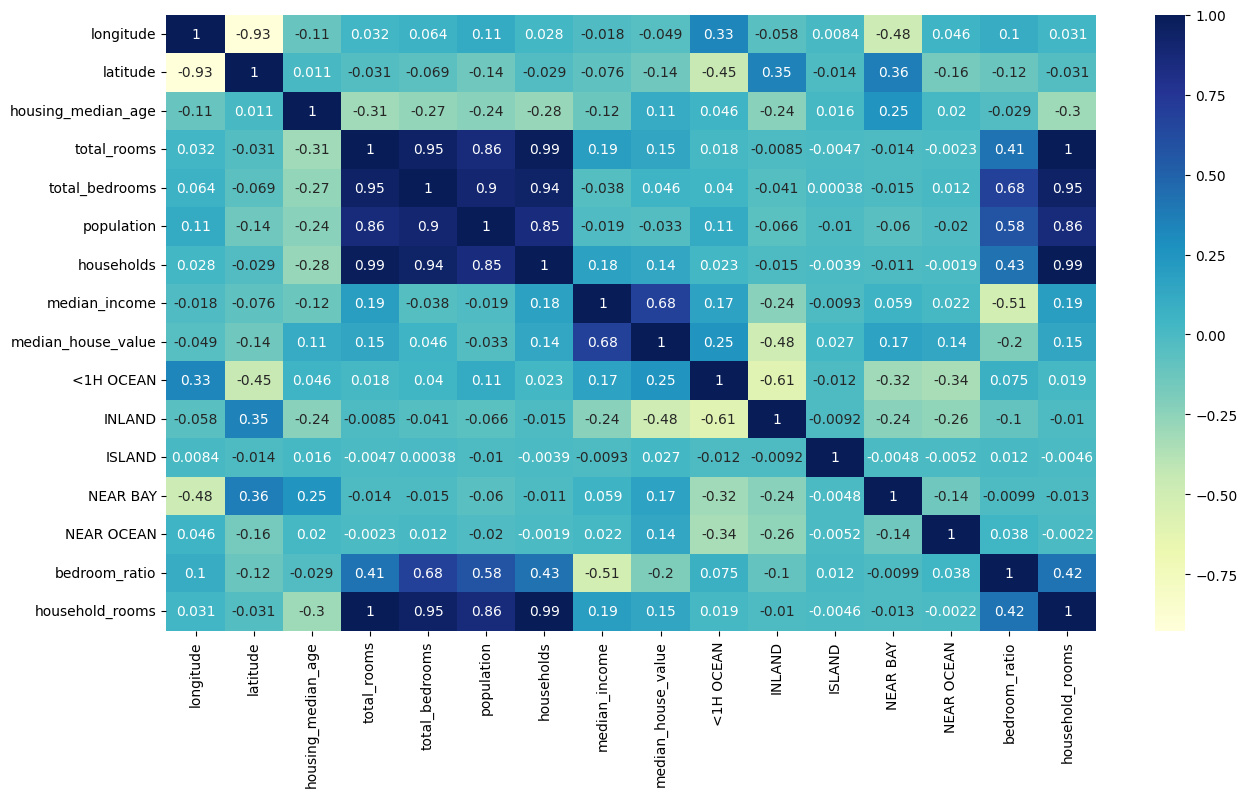

In [98]:
# Look for correlations between our new features and the rest of the data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");
# We notice that one of our new features, "household_rooms", is a bit more relevant than the standalone "households" feature

## Linear Regression Model

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

In [101]:
reg = LinearRegression()

In [102]:
reg.fit(X_train, y_train);

In [103]:
# Repeat the feature engineering steps for the test data
test_data = X_test.join(y_test)

# We take the skewed features and find their logarithm
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["total_rooms"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1) # ocean_proximity is now obsolete

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [104]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [105]:
reg.score(X_test, y_test) # Score with unscaled data

0.6826241700415001